<a href="https://colab.research.google.com/github/leodenale/sfs-python/blob/master/doc/examples/mirror-image-source-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mirror Image Sources and the Sound Field in a Rectangular Room

In [1]:
# Install sfs package
!pip install sfs

     |████████████████████████████████| 71kB 2.3MB/s 


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import sfs

In [0]:
L = 2, 2.7, 3  # room dimensions
x0 = 1.2, 1.7, 1.5  # source position
max_order = 2  # maximum order of image sources
coeffs = .8, .8, .6, .6, .7, .7  # wall reflection coefficients

## 2D Mirror Image Sources

In [0]:
xs, wall_count = sfs.util.image_sources_for_box(x0[0:2], L[0:2], max_order)
source_strength = np.prod(coeffs[0:4]**wall_count, axis=1)

In [0]:
from matplotlib.patches import Rectangle

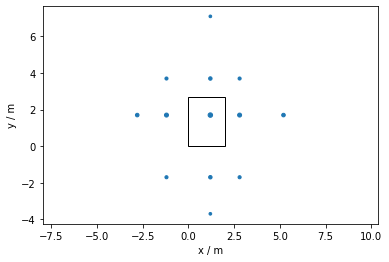

In [6]:
fig, ax = plt.subplots()
ax.scatter(*xs.T, source_strength * 20)
ax.add_patch(Rectangle((0, 0), L[0], L[1], fill=False))
ax.set_xlabel('x / m')
ax.set_ylabel('y / m')
ax.axis('equal');

## Monochromatic Sound Field

In [0]:
omega = 2 * np.pi * 1000  # angular frequency

In [0]:
grid = sfs.util.xyz_grid([0, L[0]], [0, L[1]], 1.5, spacing=0.02)
P = sfs.fd.source.point_image_sources(omega, x0, grid, L,
                                      max_order=max_order, coeffs=coeffs)

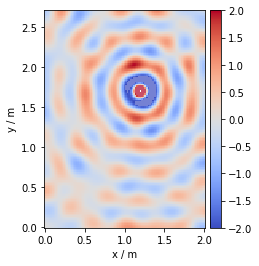

In [9]:
sfs.plot2d.amplitude(P, grid, xnorm=[L[0]/2, L[1]/2, L[2]/2]);

## Spatio-temporal Impulse Response

In [0]:
fs = 44100  # sample rate
signal = [1, 0, 0], fs

In [0]:
grid = sfs.util.xyz_grid([0, L[0]], [0, L[1]], 1.5, spacing=0.005)
p = sfs.td.source.point_image_sources(x0, signal, 0.004, grid, L, max_order,
                                      coeffs=coeffs)

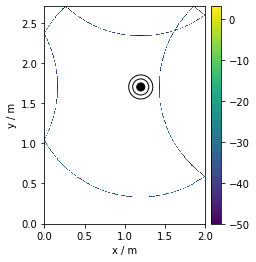

In [12]:
sfs.plot2d.level(p, grid)
sfs.plot2d.virtualsource(x0)